# 1. About this Sprint

## The purpose of this Sprint

* Understanding decision trees through scratches
* Get used to implementing complex algorithms

## How to learn

After implementing the decision tree with scratch, we will learn and verify it.

# 2. What is decision tree learning?

Decision tree learning is a machine learning method that creates a graph of a tree structure called a decision tree. In the field of machine learning, learning methods are also simply called "decision trees."


It can be used for both classification and regression, and in the case of classification, multi-value classification of 3 or more classes is possible. Only the basic classifications are dealt with here.

## What is a decision tree?

The decision tree is to repeat conditional branching on the data represented by the attribute / value pair {attribute 1: value 1, attribute 2: value 2, attribute 3: value 3, ..., attribute n: value n}. A tree-structured graph that can be assigned to a class.


The following example is a graph assigned to the holding and canceling classes according to the attribute value of the venue temperature. You can classify by a decision tree by one conditional branch, "whether the value of the attribute of the venue temperature is 35 or more". For example, if 36 degrees is input to this decision tree, the output (judgment) of cancellation can be made.

![decision tree](dt.png)

In the field of machine learning, "attributes and values" are "feature name and feature value". From now on, it is simply called a feature quantity.

## Various terms

Let's look at some important terms in the decision tree with a slightly more complicated example. Let's consider the case of classifying whether an event is held or canceled by three types of features: "rainfall", "whether indoors", and "wind strength". By learning the training data, the following decision tree can be created.

![decision tree](dt1.png)

Each circled one is called a node. You can think of a parent-child relationship for a node. For example, the node (0) is called the parent node of the nodes (1) (2) (3). Conversely, the nodes (1), (2), and (3) are called child nodes of the node (0).​


The top (0) is called the root node, and the node that represents the classification result such as (1) (4) (5) (7) (8) (9) at the end is called the leaf node.​


The conditional arrow is called the edge.​ ​The depth is the number of edges from a node to the root node. The depth of (3) is 1, the depth of (6) is 2, the depth of (9) is 3, and so on. The maximum depth of this decision tree is 3.


This is a multi-branch decision tree in which the three nodes (1), (2), and (3) are separated from (0), but in machine learning, the one that is divided into only two is unique. This is to reduce the complexity of learning.

## How to make a decision tree

There are many ways to learn a decision tree, but we'll scratch one of them.


The decision tree created depends on the learning method, hyperparameters, and training data.

## Think about estimation

Will the event be held in the following cases? Use the decision tree to make a decision.

| Rain fall\[mm\] | Whether indoors | Wind strength \[m/s\] |
| --- | --- | --- |
| 2.5 | 1(indoor) | 5 |

The answer is "hold". Follow in the order of the red line below.
![decision tree](dt2.png)
This is the operation of estimation by the decision tree.

## Features that can be handled

The decision tree can theoretically handle not only quantitative variables but also categorical variables. However, the scikit-learn implementation only supports quantitative variables, so create a scratch implementation that way. In the above example, "indoor and outdoor" in "Venue type" is a categorical variable, but it can be handled by making it a quantitative variable such as "0 and 1" in "whether indoor or not".

# 3. Decision tree scratch

We will create a class of decision trees for classification by scratching. We will implement the algorithm using only the minimum library such as NumPy.


​In the learning of the decision tree, a hyperparameter called the (maximum) depth that indicates how many times the conditional branch is repeated appears, but the implementation of depth 1 is an essential assignment. Those with a depth of 2 or more are considered as advanced assignment.


There are various learning methods, but here we will implement based on the CART method, which is also used in scikit-learn.​ ​This method only splits the branch into two to reduce the complexity of learning.


The template is prepared below. Add some code to this ScratchDecesionTreeClassifierDepth1 class.

<<**Model**>>
```
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      学習過程をoutputする場合はTrue
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程をoutput
            print()
        pass
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        pass
        return
```

## Find the conditions for division by learning
By learning, we ask under what conditions the nodes can be divided well.


Calculate the Gini Impureness and Information Gain values for the node to determine if it is well separated.

## Libraries

In [2]:
import numpy as np

In [311]:
class DecisionTreeRec():
    def __init__(self,max_depth,min_size):
        self.max_depth = max_depth
        self.min_size = min_size
    def fit(self,X,y):
        train = np.concatenate([X,np.expand_dims(y,axis = 1)],axis = 1)
        self.root = self.get_split(train)
#         print(self.root)
        self.split(self.root,self.max_depth,self.min_size,1)
#         print(self.root)
    def predict(self,X):
        predictions = []
        for x in X:
            if x[self.root['index']] < self.root['value']:
                if isinstance(self.root['left'], dict):
                    predictions.append(self.predict_recur(self.root['left'], x))
                else:
                    predictions.append(self.root['left'])
            else:
                if isinstance(self.root['right'], dict):
                    predictions.append(self.predict_recur(self.root['right'], x))
                else:
                    predictions.append(self.root['right'])
        return np.array(predictions)
    def predict_recur(self,node,X):
        if X[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict_recur(node['left'], X)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict_recur(node['right'], X)
            else:
                return node['right']
    def test_split(self,index,value,dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right
    def gini_index(self,groups,classes):
        # count all samples at split point
        n_instances = float(sum([len(group) for group in groups]))
        # sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            # avoid divide by zero
            if size == 0:
                continue
            score = 0.0
            # score the group based on the score for each class
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini
    def get_split(self,dataset):
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(dataset[0])-1):
            for row in dataset:
                groups = self.test_split(index, row[index], dataset)
                gini = self.gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}
    def to_terminal(self,group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    def split(self,node,max_depth,min_size,depth):
        left, right = node['groups']
        del(node['groups'])
        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            return
        # check for max depth
        if depth >= max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            return
        # process left child
        if len(left) <= min_size:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.get_split(left)
            self.split(node['left'], max_depth, min_size, depth+1)
        # process right child
        if len(right) <= min_size:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.get_split(right)
            self.split(node['right'], max_depth, min_size, depth+1)
    def print_tree(self,depth=0):
        if isinstance(self.root, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (self.root['index']+1), self.root['value'])))
            self.print_tree_rec(self.root['left'], depth+1)
            self.print_tree_rec(self.root['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', self.root)))
    def print_tree_rec(self,node,depth):
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            self.print_tree_rec(node['left'], depth+1)
            self.print_tree_rec(node['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', node)))
        
    

## Problem 1: Function for finding impureness
Create a function to calculate the Gini impurity​​ ​of a node. For node t, the Gini impurity I(t) can be obtained by the following formula The more mixed the classes are, the higher the Gini impurity.
  
<center> $I(t) = 1 - \sum_{i=1}^{K} P^{2}(C_i|t) = 1 - \sum_{i=1}^{K} (\frac{N_{t,i}}{N_{t,all}}) ^2$ </center>

$t$: Index of nodes \
$i$: Index of classes \
$K$: Number of classes \
$C_i$: The i-th class \
$P(C_i|t)$: Proportion of C_i at the t-th node \
$N_{t,i}$: Number of samples belonging to the i-th class of the t-th node \
$N_{t,all}$: Total number of samples at the t-th node

First, make a simple example and compare the results of the manual calculation with the function.

<<**Example**>>
* Class 1: Number of samples 15, Class 2: Number of samples 15 → Gini impure 0.500
* Class 1: Number of samples 15, Class 2: Number of samples 15, Class 3: Number of samples 15 → Gini impure 0.667
* Class 1: Number of samples 18, Class 2: Number of samples 12 → Gini impure 0.480
* Class 1: Number of samples 30, Class 2: Number of samples 0 → Gini impure 0.000

## Problem 2: Function for finding information gain

Next, create a function to calculate the **information gain** between the nodes. Gini Impurity **I(t)** created in Problem 1 **IG**,
can be found by the following formula. The better the separation, the greater the information gain.

Since there are only two branches here, the branch destination is called the "left node / right node".

<center> $ IG(p) = I(p) - \frac{N_{left,all}}{N_{p,all}} I(left) - \frac{N_{right,all}}{N_{p,all}} I(right) $</center>

$p$: Index indicating the parent node \
**left**: Index showing the left-hand node \
**right**: Index showing the nodes on the right \

First, make a simple example and compare the results of the manual calculation with the function.

<<**Example**>>

Left node class 1: Number of samples 10, Left node class 2: Number of samples 30, Right node class 1: Number of samples 20, Right node class 2: Number of samples 5 → Information gain 0.143

## Problem 3: Learning
Write the code to split the space and generate a graph of the decision tree. Since it is a decision tree with a depth of 1, we will divide it only once. Generating a graph here means finding which feature quantity is more than how many as a condition for one division.


All combinations of training data are divided, and the division that maximizes the information gain between nodes is recorded as the division criterion for that node.


A node with zero impureness that does not mix classes, or a node with a specified depth is a **leaf node**. A class is recorded in the leaf node, and this is used as the class to be classified at the time of estimation. If the classes are not mixed, record the class as it is, and if it is mixed, decide by majority vote.


<< **How to take a combination** >>


The simplest way to take all combinations is to use the value of each feature as a threshold value for division. Use this method for this scratch on one end.


Another method is to set an intermediate value as the threshold, and scikit-learn uses this method.


<< **Supplement** >>


The function for calculating the information gain in Problem 2 is not suitable for use in Problem 3, as it is not possible to calculate the impurity of the parent node 
$I(p)$
is fixed, the same result can be obtained by simply summing the impurity of the left and right nodes. However, here the implementation should take into account the parent node and calculate the information gain.



## Problem 4: Estimate
Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchDecesionTreeClassifierDepth1 class.


Judge the value of the input data under the learned conditions and see which leaf node is reached. Since the class is recorded in the leaf node, this is the estimate.



# 4. Verification

## Problem 5: Learning and estimation
Learn and estimate the scratch implementation for the binary classification of Simple Dataset 2 prepared in Sprint, an introduction to machine learning scratch.


Compare this with the scikit-learn implementation and see if it works correctly.


Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [266]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [267]:
print("X shape",X.shape)
print("Y shape",y.shape)
train = np.concatenate([X,np.expand_dims(y,axis = 1)],axis = 1)
print("Train shape",train.shape)

X shape (40, 2)
Y shape (40,)
Train shape (40, 3)


In [312]:
my_model = DecisionTreeRec(max_depth=1,min_size=1)

In [313]:
my_model.fit(X,y)

In [314]:
my_model.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1.])

In [315]:
my_model.print_tree()

[X2 < 5.352]
 [0.0]
 [1.0]


## Problem 6: Visualization of decision area
Visualise the decision area.

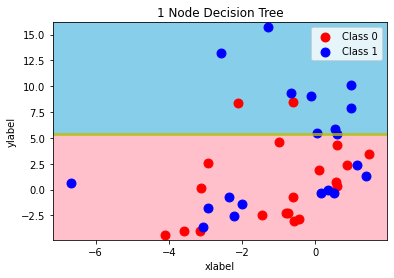

In [316]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='1 Node Decision Tree', xlabel='xlabel', ylabel='ylabel', target_names=['Class 0', 'Class 1']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    散布図の点はTraining dataまたはValidation dataである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X,y,my_model)

# 5. Deeper decision tree

## Problem 7: (Advance assignment) Creation of a decision tree classifier class with a depth of 2

Create a decision tree classifier class ScratchDecesionTreeClassifierDepth2 with a depth of 2.


Depth 2 means that the space is divided twice.


《**Hint**》


Treating each node as an instance makes it easier to extend to any depth.

In [317]:
depth_2_model = DecisionTreeRec(max_depth=2,min_size=2)

In [318]:
depth_2_model.fit(X,y)

In [319]:
depth_2_model.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1.])

In [320]:
depth_2_model.print_tree()

[X2 < 5.352]
 [X2 < 2.546]
  [0.0]
  [0.0]
 [X1 < -0.122]
  [1.0]
  [1.0]


## Problem 8: (Advance assignment) Creation of decision tree classifier class with unlimited depth
Create a decision tree classifier class ScratchDecesionTreeClassifierDepthInf with unlimited depth.


Allow any depth to be specified, otherwise allow all leaf nodes to continue until all Gini impureness is zero.

In [321]:
depth_inf_model = DecisionTreeRec(max_depth=np.inf,min_size=2)

In [322]:
depth_inf_model.fit(X,y)

In [323]:
depth_inf_model.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [324]:
depth_inf_model.print_tree()

[X2 < 5.352]
 [X2 < 2.546]
  [X2 < -1.822]
   [X1 < -1.462]
    [X1 < -3.060]
     [X1 < -3.594]
      [0.0]
      [0.0]
     [1.0]
    [X1 < -0.447]
     [X1 < -1.462]
      [0.0]
      [0.0]
     [0.0]
   [X2 < 0.154]
    [X2 < -0.723]
     [X1 < -0.613]
      [1.0]
      [0.0]
     [X1 < 0.351]
      [1.0]
      [1.0]
    [X1 < 1.132]
     [X1 < -3.111]
      [1.0]
      [X1 < 0.106]
       [0.0]
       [X1 < 0.106]
        [0.0]
        [0.0]
     [1.0]
  [X1 < -0.989]
   [0.0]
   [X1 < -0.989]
    [0.0]
    [0.0]
 [X1 < -0.122]
  [X2 < 9.344]
   [0.0]
   [X1 < -1.281]
    [1.0]
    [1.0]
  [X1 < 0.968]
   [X1 < 0.546]
    [1.0]
    [1.0]
   [1.0]
